# Hair Type Classification using Transfer Learning !!!

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator 
from keras import layers, models
from keras.applications import MobileNetV2
import os
from PIL import Image

In [2]:
dataset_path = 'data/data'

In [3]:
subfolders = [f.name for f in os.scandir(dataset_path) if f.is_dir()] 
print("Subfolders (hair types):", subfolders)

Subfolders (hair types): ['curly', 'dreadlocks', 'kinky', 'Straight', 'Wavy']


In [4]:
for subfolder in subfolders: 
    image_counts = {}
    folder_path = os.path.join(dataset_path,subfolder) 
    num_images = len([f for f in os.listdir(folder_path) 
                      if os.path.isfile(os.path.join(folder_path, f))])

In [5]:
df = pd.DataFrame(list(image_counts.items()), columns=['Hair Type', 'Image Count'])

In [6]:
df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [Hair Type, Image Count]
Index: []>

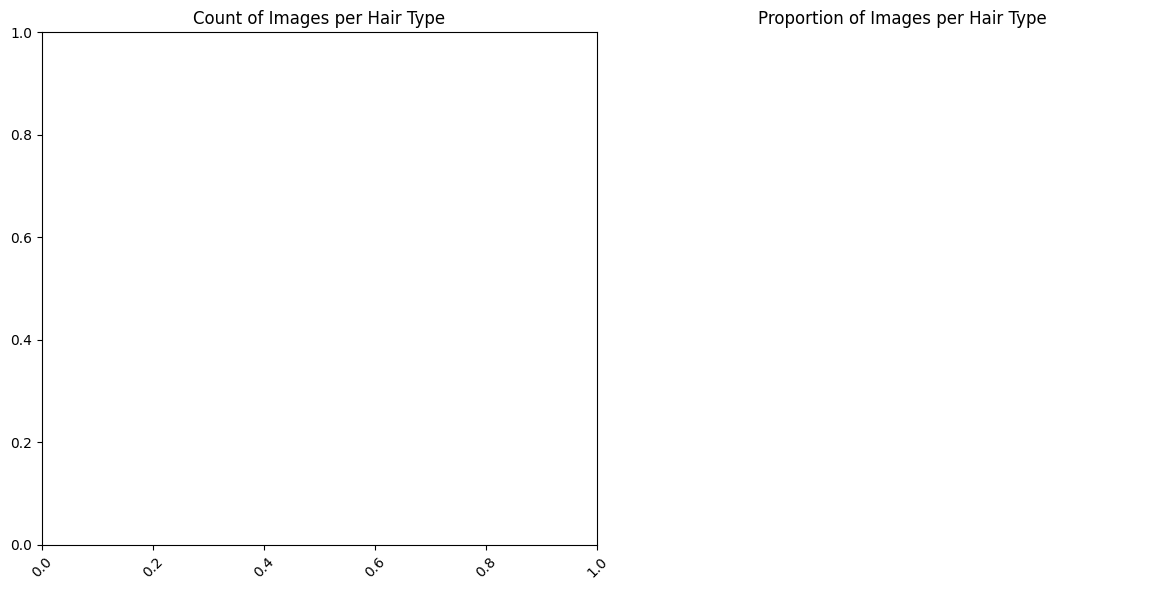

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Hair Type', y='Image Count', data=df) 
plt.title('Count of Images per Hair Type') 
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.pie(df['Image Count'],  labels=df['Hair Type'],  autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Images per Hair Type')
plt.tight_layout() 
plt.show()

<Figure size 640x480 with 0 Axes>

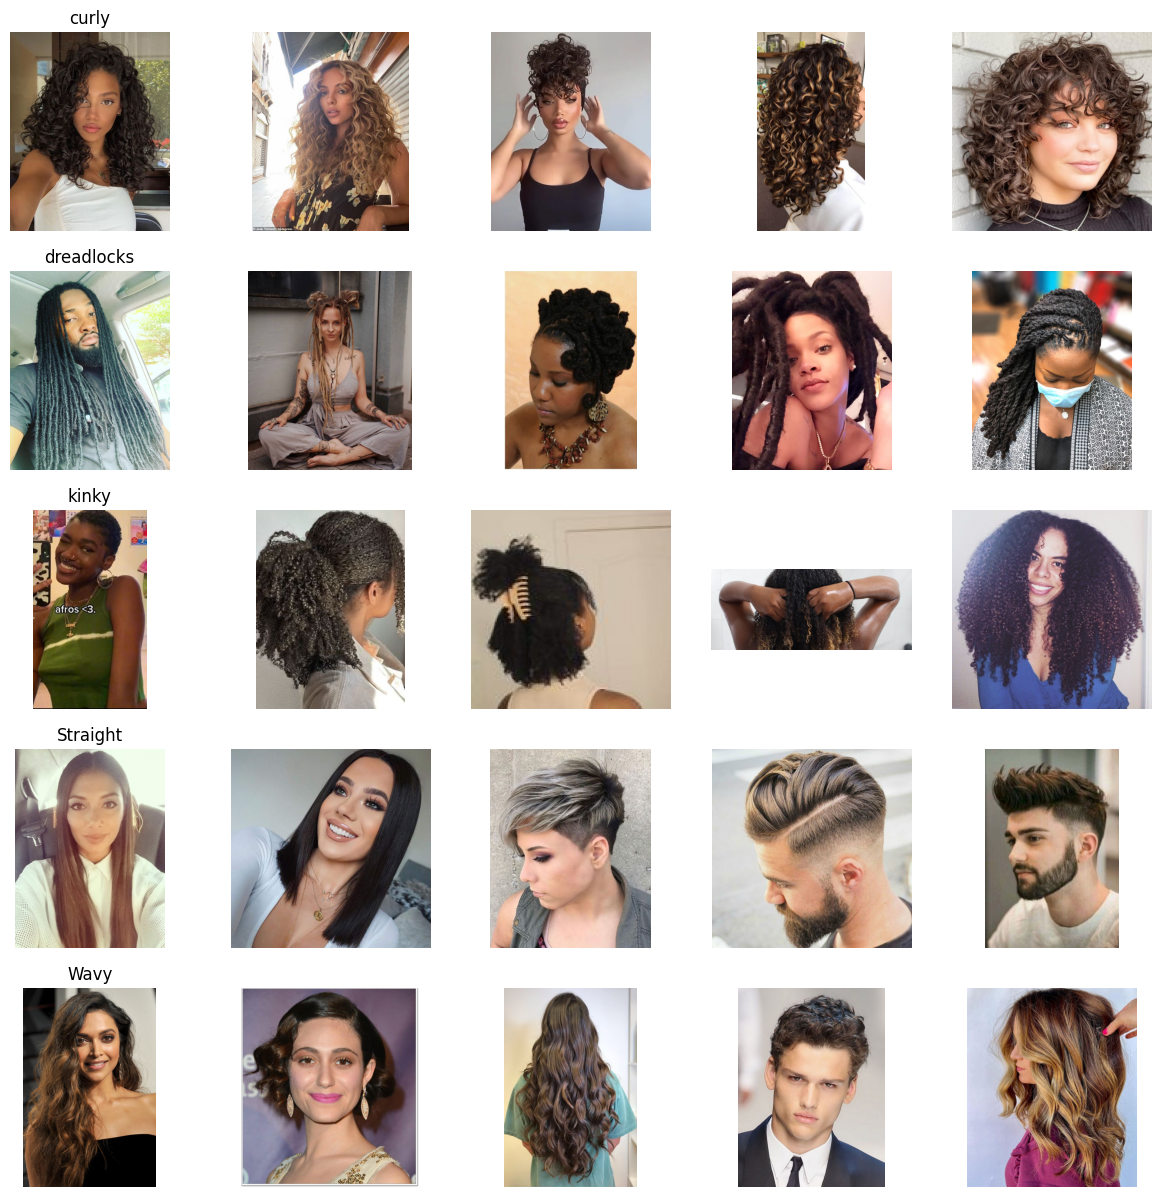

In [8]:
def display_images_from_folders(dataset_path, subfolders, num_images=5):
      fig,axs = plt.subplots(len(subfolders),  num_images,  figsize=(15, 3 * len(subfolders)))
      for i, subfolder in enumerate(subfolders):
          folder_path = os.path.join(dataset_path, subfolder)
          images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
          for j in range(min(num_images, len(images))): 
              img_path = os.path.join(folder_path, images[j]) 
              img = Image.open(img_path)
              axs[i, j].imshow(img) 
              axs[i, j].axis('off')
              if j == 0:
                  axs[i, j].set_title(subfolder,  fontsize=12)
plt.tight_layout() 
plt.show()
display_images_from_folders(dataset_path,  subfolders,  num_images=5)

In [9]:
print("Num  GPUs  Available:  ", len(tf.config.experimental.list_physical_devices('GPU'))) 
print(tf.config.list_physical_devices())

Num  GPUs  Available:   0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [10]:
img_height, img_width  =  224,  224
batch_size = 32
epochs = 10

In [11]:
train_datagen  =  ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [12]:
train_generator = train_datagen.flow_from_directory( dataset_path,
                        target_size=(img_height, img_width), 
                        batch_size=batch_size, class_mode='categorical', subset='training')

Found 1592 images belonging to 5 classes.


In [13]:
validation_generator = train_datagen.flow_from_directory( dataset_path,
                            target_size=(img_height, img_width), 
                            batch_size=batch_size, class_mode='categorical', subset='validation')

Found 395 images belonging to 5 classes.


In [14]:
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False,  weights='imagenet')

In [15]:
base_model.trainable = False

In [16]:
model = models.Sequential([ base_model, 
                layers.GlobalAveragePooling2D(),
                layers.Dense(128,  activation='relu'), 
                layers.Dense(len(train_generator.class_indices),
                activation='softmax')
])

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit( train_generator,validation_data=validation_generator, epochs=epochs)

Epoch 1/10


C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 570ms/step - accuracy: 0.5531 - loss: 1.1393 - val_accuracy: 0.7595 - val_loss: 0.6065
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.8371 - loss: 0.4144 - val_accuracy: 0.7873 - val_loss: 0.6269
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 453ms/step - accuracy: 0.9168 - loss: 0.2701 - val_accuracy: 0.8456 - val_loss: 0.4803
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 443ms/step - accuracy: 0.9462 - loss: 0.1882 - val_accuracy: 0.8304 - val_loss: 0.5117
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 0.9719 - loss: 0.1376 - val_accuracy: 0.7848 - val_loss: 0.5686
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 442ms/step - accuracy: 0.9732 - loss: 0.1142 - val_accuracy: 0.8076 - val_loss: 0.5372
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step - accuracy: 0.9871 - loss: 0.0834 - val_accuracy: 0.8076 - val_loss: 0.5785
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 436ms/step - accuracy: 0.9950 - loss: 0.0565 - val_accuracy: 0.825

In [19]:
loss, accuracy = model.evaluate(validation_generator) 
print(f"Validation Accuracy => {accuracy*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 465ms/step - accuracy: 0.8250 - loss: 0.5967
Validation Accuracy => 82.03%


In [20]:
acc   =   history.history['accuracy']
val_acc   =   history.history['val_accuracy']
loss   =    history.history['loss'] 
val_loss = history.history['val_loss']
epochs_range = range(epochs) 

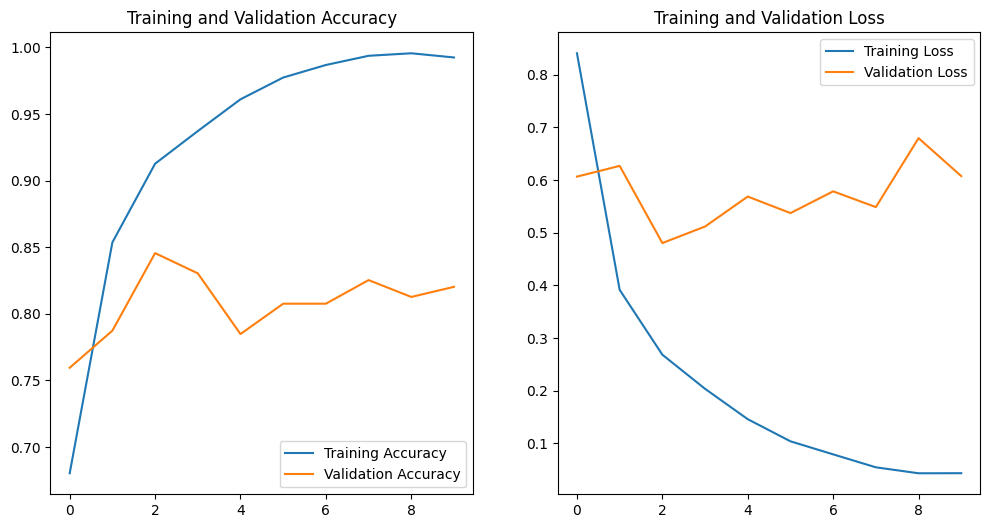

In [21]:
plt.figure(figsize=(12,  6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()